In [1]:
arquivo = open('vl_avep.dat','r')

In [2]:
texto = arquivo.read()

In [3]:
arquivo.close()

In [4]:
listaLinhas = texto.split('\n')

In [5]:
listaEntradasCruas = []
for linha in listaLinhas:
    listaEntradasCruas.append( linha.split() )

In [6]:
len(listaEntradasCruas[0])

17

In [7]:
#extraindo colunas mais significantes para propósito da atividade
listaSignificantes = []
for x in listaEntradasCruas:
    if len(x) == 17:
        listaSignificantes.append( [
            int(x[1]),float(x[2]),
            int(x[3]),float(x[4])
        ] )

In [8]:
len(listaSignificantes)

3297

In [9]:
import pandas as pd
df = pd.DataFrame(listaSignificantes, columns=[
                    'vikingYear','longitudeAreocentrica',
                    'sol', 'pressaoAtmosfericaMediaDiaria'
                 ])

In [10]:
df.head()

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
0,1,97.039,0,7.624
1,1,97.196,1,7.629
2,1,97.655,2,7.606
3,1,98.113,3,7.581
4,1,98.572,4,7.579


In [11]:
df.describe()

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
count,3297.000000,3297.000000,3297.000000,3297.000000
mean,2.208371,175.332975,932.032150,4.326321
std,0.984382,99.812295,627.184194,7.422470
min,1.000000,0.013000,0.000000,-9.999000
25%,1.000000,95.774000,412.000000,6.867000
50%,2.000000,168.353000,824.000000,7.790000
75%,3.000000,258.612000,1421.000000,8.459000
max,4.000000,359.967000,2245.000000,10.198000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297 entries, 0 to 3296
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vikingYear                     3297 non-null   int64  
 1   longitudeAreocentrica          3297 non-null   float64
 2   sol                            3297 non-null   int64  
 3   pressaoAtmosfericaMediaDiaria  3297 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 103.2 KB


In [13]:
#verificando valores ausentes e duplicatas
print( df.isnull().sum(),"\n\n\n", df.duplicated().sum())

vikingYear                       0
longitudeAreocentrica            0
sol                              0
pressaoAtmosfericaMediaDiaria    0
dtype: int64 


 0


In [14]:
#verificando noValueFlag de acordo com o documentado em vl_avep.lbl
print(
(df['pressaoAtmosfericaMediaDiaria'] == -9.999).sum(),
(df['pressaoAtmosfericaMediaDiaria'] != -9.999).sum()
)

692 2605


In [15]:
# DEFININDO TRANSFORMAÇÕES E NORMALIZAÇÕES.
#Transformação de campos válidos de pressão em milibar para pascal
def millibarParaPascal(mb=-9.999):
    if mb != -9.999:
        return mb*100
    return -9.999
#Normalizar longitude solar areocentrica
# 0=equinócio para norte, 1=solstício para norte,
# 2=equinócio para sul,   3=solstício para sul.
def normalizarLSA( lsa=0 ):
    if lsa <= 90:
        return 0
    elif lsa > 90 and lsa <=180:
        return 1
    elif lsa > 180 and lsa <=270:
        return 2
    else:
        return 3

In [16]:
#APLICANDO TRANSFORMAÇÕES E NORMALIZAÇÕES
#Pressão atmosférica em unidades SI padrão
df['pressaoAtmosfericaMediaDiaria']=df['pressaoAtmosfericaMediaDiaria'].apply(millibarParaPascal)
#Longitude solar areocentrica abstrata em 4 valores
df['longitudeAreocentrica']=df['longitudeAreocentrica'].apply(normalizarLSA)

In [17]:
df.head(1)

,vikingYear,longitudeAreocentrica,sol,pressaoAtmosfericaMediaDiaria
0,1,1,0,762.4


In [23]:
# convertendo noValueFlag para média dos campos válidos
subconjunto = df[df['pressaoAtmosfericaMediaDiaria'] != -9.999]
mediaDosValidos = subconjunto['pressaoAtmosfericaMediaDiaria'].mean()
print(mediaDosValidos)
df['pressaoAtmosfericaMediaDiaria']=df['pressaoAtmosfericaMediaDiaria'].replace(-9.999, mediaDosValidos)

813.1742418426105


<Axes: >

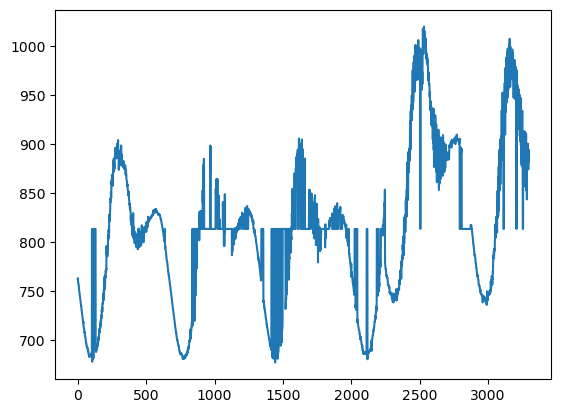

In [41]:
df['pressaoAtmosfericaMediaDiaria'].plot(kind='line')

<Axes: >

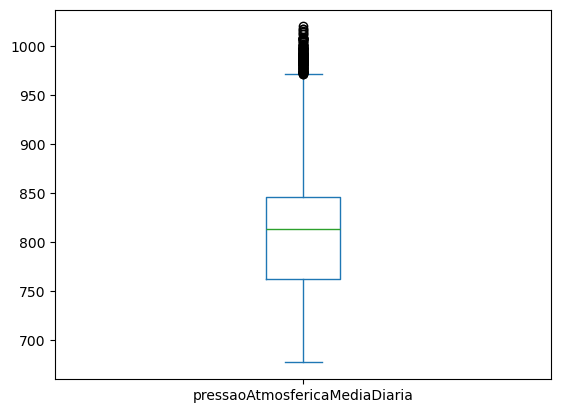

In [40]:
#Verificando transformação anterior e buscando outliers
df['pressaoAtmosfericaMediaDiaria'].plot(kind='box')

<Axes: >

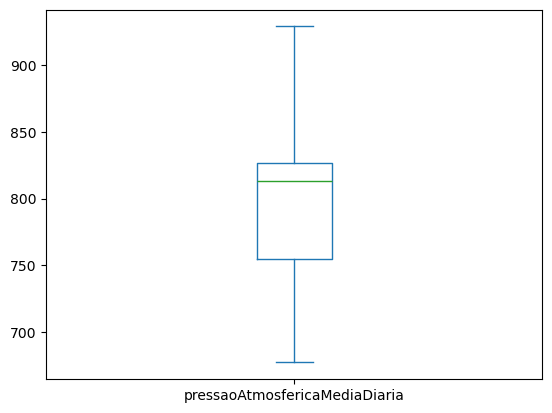

In [68]:
getOutOutliers = df[df['pressaoAtmosfericaMediaDiaria'] < df['pressaoAtmosfericaMediaDiaria'].quantile(0.92)]
getOutOutliers['pressaoAtmosfericaMediaDiaria'].plot(kind='box')

In [67]:
#salvando os dados manipulados
df.to_csv('chrysePlanitia.csv', index=False)